<a href="https://colab.research.google.com/github/yoshivarma/DataScience/blob/main/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all required libraries
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import math
from scipy.stats.mstats import mode
from matplotlib import pyplot as plt


In [ ]:
#upload files
from google.colab import files
upload = files.upload()

Saving house_votes_84.csv to house_votes_84.csv


In [ ]:
#Load data
data = pd.read_csv('house_votes_84.csv')

In [ ]:
# shuffling, splitting data, normalizing
def Split_data(dataset):
  dataset = shuffle(dataset)
  X = dataset[dataset.columns[0:16]]
  y = dataset[dataset.columns[16]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  return X_train, X_test, y_train, y_test

In [ ]:
#defining Entropy
def Entropy(target):
  
  counts = target.value_counts()
  
  labels = np.unique(target)
  probability = 0.0

  for count in counts:
    P = 0.0
    term1 = count/np.sum(counts)
    term2 = math.log2(count/np.sum(counts))
    P = term1*term2
    probability = probability + P
  return -probability


In [ ]:
#define Best Split
def best_split(df, features):
  B = None
  y = -1
  
  for feature in features:
    ID = 0
    ## entropy of the parent class
    entropy = Entropy(df['target'])

    #Average entropy
    labels = np.unique(df[feature])
    if len(labels)>0:
      probability =0
      i = 0

      for v in labels:
        count = len(df[df[feature]==v])
        probability = count/len(df[feature])
        cal_df =df[df[feature]==v] 
        De = Entropy(cal_df['target']) 
        ID = (probability * De) +ID
        
      i_g = entropy - ID
      if i_g > y:
        B = feature
        y = i_g
  
  return B


In [ ]:
#class node
class Node:
  
  def __init__(self):
    self.data = 0
    self.leftChild = None
    self.middleChild = None
    self.rightChild = None

In [ ]:
#Growing Decision Trees
def Decision_Trees(df, features):
  N = Node()
  y = 0.0
  
 #stopping criteria 1

  if len(features)==1 or len(features)==0:
    N.data = int(df['target'].mode().values[0])
    return N


  #stopping criteria 2
  uni = len(np.unique(df['target']))
  if uni == 1:
    N.data =  int(np.unique(df['target']))
    return N

  
  best_feature = best_split(df, features)
  N.data = best_feature 
  features.remove(best_feature)

  for v in np.unique(df[best_feature]):

    if len(df[df[best_feature]==0]) == 0 or len(df[df[best_feature]==1])==0 or len(df[df[best_feature]==2])==0:
      N.data = int(df['target'].mode().values[0])
      return N
    #recursive function  
    N.leftChild = Decision_Trees(df[df[best_feature]==0], features)
    N.middleChild = Decision_Trees(df[df[best_feature]==1], features)
    N.rightChild = Decision_Trees(df[df[best_feature]==2], features)
  
  return N
    

In [ ]:
#Predicting values
def prediction(root, test, i ):
  
  if type(root.data) ==int:
    leaf = root.data
    return leaf

  else:
    value = test.at[i, root.data]
    if value==0:
      leaf = prediction(root.leftChild, test, i)

    if value==1:
      leaf = prediction(root.middleChild, test, i)

    if value==2:
      leaf = prediction(root.rightChild, test, i)

  return leaf

In [ ]:
#define accuracy
def accuracy(V, y_test, X_test):
  predicted_values = list()
  score =0
  array = y_test.to_numpy()
  accuracy = 0
  
  index = X_test.index.values  
  for i in range(len(X_test)):
    predicted_values.append(prediction(V, X_test.iloc[[i]], index[i]))
    
  for i in range(len(predicted_values)):
    if predicted_values[i] == array[i]:
      score +=1

  accuracy = score/len(predicted_values)
  
  return accuracy


In [ ]:
#Calculating accuracies on training data
accuracies_train = list()
for i in range(100):
  X_train, X_test, y_train, y_test = Split_data(data)
  new_data = pd.concat([X_train, y_train], axis=1)
  features = list(new_data.columns[:15])
  V = Decision_Trees(new_data, features)

  accuracy_trained = accuracy(V, y_train, X_train)
  accuracies_train.append(accuracy_trained)
  


In [ ]:
#Calculating accuracies on training data
accuracies_test = list()
for i in range(100):
  X_train, X_test, y_train, y_test = Split_data(data)
  new_data = pd.concat([X_train, y_train], axis=1)
  features = list(new_data.columns[:15])
  V = Decision_Trees(new_data, features)

  accuracy_tested = accuracy(V, y_test, X_test)
  accuracies_test.append(accuracy_tested)

In [ ]:
#Calculating accuracies on testing data
def testing_prediction(dataset):
  accuracies = list()
  for i in range(100):
    X_train, X_test, y_train, y_test = Split_data(data)
    accuracy_tested = accuracy(y_test, X_test)
    accuracies.append(accuracy_tested)
  
  return accuracies

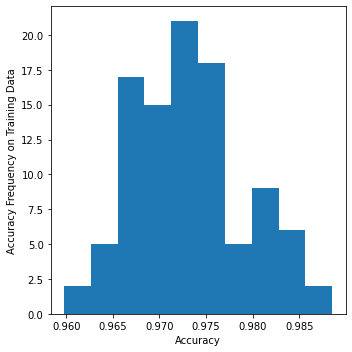

In [ ]:
#Plotting training data
fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5),
                        tight_layout = True)
 
axs.hist(accuracies_train)
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency on Training Data')

# Show plot
fig.savefig('training_data.png')
plt.show()

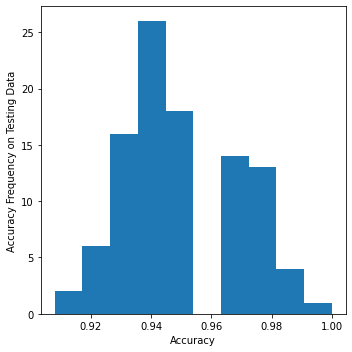

In [ ]:
#Plotting testing data
fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5),
                        tight_layout = True)
 
axs.hist(accuracies_test, bins=10)
 
# Show plot
plt.xlabel('Accuracy')
plt.ylabel('Accuracy Frequency on Testing Data')
fig.savefig('testing_data.png')
plt.show()

In [ ]:
from statistics import mean
from statistics import stdev

In [ ]:
mean(accuracies_train)

0.9717816091954024

In [ ]:
mean(accuracies_test)

0.9508045977011494

In [ ]:
stdev(accuracies_train)

0.006007955604578057

In [ ]:
stdev(accuracies_test)

0.01954193721582686